In [0]:
!pip install mysql-connector-python


     |████████████████████████████████| 13.0MB 4.4MB/s 


In [0]:
import mysql.connector

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path_to_csv = "/content/gdrive/My Drive/Colab Notebooks/"

In [0]:
conn = mysql.connector.connect(
         user='foouser',
         password='F88Pa%%**',
         host='134.209.144.239',
         database='stocksdb')
print(conn)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import tensorflow as tf
import numpy as np
import csv
from sklearn.preprocessing import MinMaxScaler

In [0]:
query = "select * from interview"
cursor = conn.cursor()
cursor.execute(query)
records  = cursor.fetchall()
print(records)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
# with open("lstm_stock_dataset.csv","w") as outfile:
#   writer = csv.writer(outfile,quoting = csv.QUOTE_ALL)
#   writer.writerow(col[0] for col in cursor.description)
#   for row in cursor:
#     writer.writerow(row)
# data = pd.read_sql_query(query,conn)
# data.to_csv("lstm_stock_dataset.csv",index = False)

In [0]:
#dataframe = pd.read_csv("lstm_stock_dataset.csv")

dataframe = pd.read_sql(query,conn)

In [0]:
dataframe.sort_values('datetime').head()

,isin,insertion_datetime,datetime,open,high,low,close,volume,open_interest
489906,INE492A01029,NaT,2017-04-03 09:15:00,717.80,718.00,717.80,718.00,27,NaN
34875,INE545A01016,NaT,2017-04-03 09:15:00,223.45,223.45,223.45,223.45,20,NaN
489907,INE492A01029,NaT,2017-04-03 09:16:00,718.00,723.95,718.00,723.75,61,NaN
34876,INE545A01016,NaT,2017-04-03 09:16:00,223.45,223.45,223.45,223.45,0,NaN
489908,INE492A01029,NaT,2017-04-03 09:17:00,723.75,723.75,719.05,719.05,100,NaN


In [0]:
dataframe.drop(columns = ['insertion_datetime','open_interest'],inplace= True)

In [0]:
dataframe.describe()

,open,high,low,close,volume
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1483.673727,1484.529598,1482.876855,1483.721753,407.884840
std,1231.689627,1232.654749,1230.771130,1231.747869,2228.894209
min,9.000000,9.000000,9.000000,9.000000,0.000000
25%,587.750000,587.950000,587.500000,587.750000,0.000000
50%,891.600000,892.100000,891.000000,891.525000,0.000000
75%,2365.000000,2365.012500,2365.000000,2365.000000,107.000000
max,4927.950000,4953.900000,4855.400000,4928.000000,365036.000000


In [0]:
import datetime as dt
dataframe['Date']= dataframe['datetime'].apply(lambda x: x.strftime('%m/%d/%Y'))
dataframe['hours'] = dataframe['datetime'].dt.hour
dataframe.head()

,isin,datetime,open,high,low,close,volume,Date,hours
0,INE545A01016,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,01/01/2018,9
1,INE545A01016,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,01/01/2018,9
2,INE545A01016,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,01/01/2018,9
3,INE545A01016,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,01/01/2018,9
4,INE545A01016,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,01/01/2018,9


In [0]:
grouped=dataframe.groupby(['Date', 'hours'], sort=False)

In [0]:
df_new=pd.DataFrame(data=grouped['open'].agg(np.min).values, columns=['open'])
df_new['close']=grouped['close'].agg(np.max).values
df_new['high']=grouped['close'].agg(np.max).values
df_new['low']=grouped['close'].agg(np.min).values
df_new['volume']=grouped['volume'].agg(np.max).values
df_new['Date']=grouped['Date'].agg(np.unique).values
df_new['hours']=grouped['hours'].agg(np.unique).values


In [0]:
df_new.head()

,open,close,high,low,volume,Date,hours
0,16.5,2453.15,2453.15,16.5,26588,01/01/2018,9
1,16.5,2453.15,2453.15,16.5,2026,01/01/2018,10
2,16.5,2453.15,2453.15,16.5,6000,01/01/2018,11
3,17.0,2453.15,2453.15,17.0,2905,01/01/2018,12
4,17.0,2453.15,2453.15,17.0,2574,01/01/2018,13


In [0]:
df_new.shape

(3011, 7)

In [0]:
high_prices = df_new.loc[:,'high'].as_matrix()
low_prices = df_new.loc[:,'low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


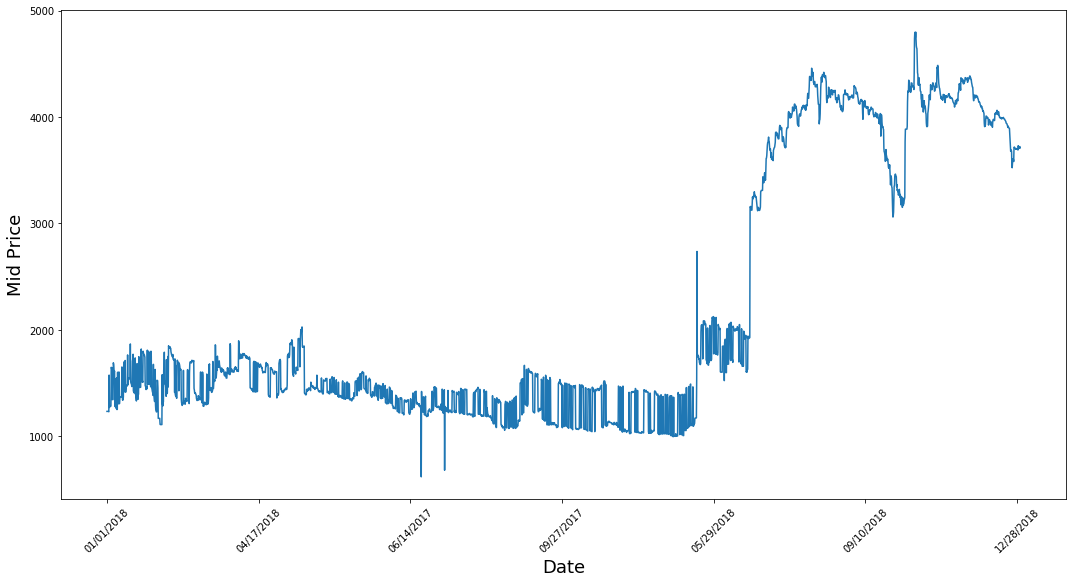

In [0]:
plt.figure(figsize = (18,9))
plt.plot(range(df_new.shape[0]),(df_new['low']+df_new['high'])/2.0)
plt.xticks(range(0,df_new.shape[0],500),df_new['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [0]:
train_data=mid_prices[:2000]
test_data=mid_prices[2000:]

In [0]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)


In [0]:
smoothing_window_size = 100
for di in range(0,1900,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size, :])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [0]:


train_data = train_data.reshape(-1)
test_data = scaler.transform(test_data).reshape(-1)

EMA = 0.0
gamma = 0.1
for ti in range(1900):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [0]:
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [0]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = dataframe.loc[pred_idx,'datetime']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.01678


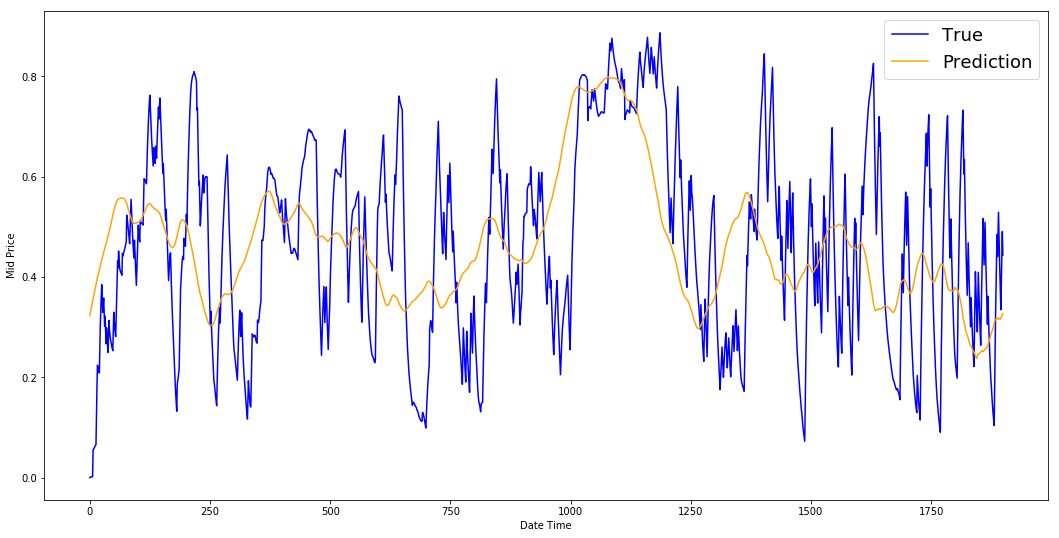

In [0]:
plt.figure(figsize = (18,9))
plt.plot(range(1900),all_mid_data[:1900],color='b',label='True')
plt.plot(range(1900),std_avg_predictions[:1900],color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date Time')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()



In [0]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [5.0120585e-04 5.5391306e-01 3.3047426e-01 7.4769056e-01 3.7435162e-01]

	Output: [5.0120585e-04 4.9445960e-01 2.7631110e-01 7.4769056e-01 2.7362266e-01]


Unrolled index 1
	Inputs:  [0.00095229 0.5366461  0.36244342 0.74110836 0.33779967]

	Output: [0.00245489 0.518419   0.33018497 0.65679497 0.33408913]


Unrolled index 2
	Inputs:  [0.00135827 0.518419   0.33018497 0.7347937  0.3040252 ]

	Output: [0.0022094  0.5077826  0.2763111  0.69297266 0.27362266]


Unrolled index 3
	Inputs:  [0.00176293 0.5077826  0.30276927 0.69297266 0.27362266]

	Output: [0.05605114 0.5077826  0.2763111  0.5671948  0.27362266]


Unrolled index 4
	Inputs:  [0.00212712 0.4944596  0.2763111  0.65679497 0.33408913]

	Output: [0.00245489 0.55637527 0.19759907 0.53801435 0.33408913]


In [0]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 100 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

In [0]:
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [0]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [0]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')  

Defining prediction related TF functions
	All done


In [0]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 10 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(0,1900,100).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

Initialized
Average loss at step 1: 3.087428
	Test MSE: 0.07884
	Finished Predictions
Average loss at step 2: 0.778473
	Test MSE: 0.05127
	Finished Predictions
Average loss at step 3: 0.601326
	Test MSE: 0.04779
	Finished Predictions
Average loss at step 4: 0.551892
	Test MSE: 0.04902
	Finished Predictions
Average loss at step 5: 0.496814
	Test MSE: 0.05007
	Finished Predictions
Average loss at step 6: 0.448482
	Decreasing learning rate by 0.5
	Test MSE: 0.04944
	Finished Predictions
Average loss at step 7: 0.421908
	Test MSE: 0.04516
	Finished Predictions
Average loss at step 8: 0.402594
	Test MSE: 0.05434
	Finished Predictions
Average loss at step 9: 0.369956
	Test MSE: 0.05246
	Finished Predictions
Average loss at step 10: 0.361440
	Decreasing learning rate by 0.5
	Test MSE: 0.05473
	Finished Predictions
Average loss at step 11: 0.340603
	Test MSE: 0.05816
	Finished Predictions
Average loss at step 12: 0.353265
	Test MSE: 0.06179
	Finished Predictions
Average loss at step 13: 0.3344

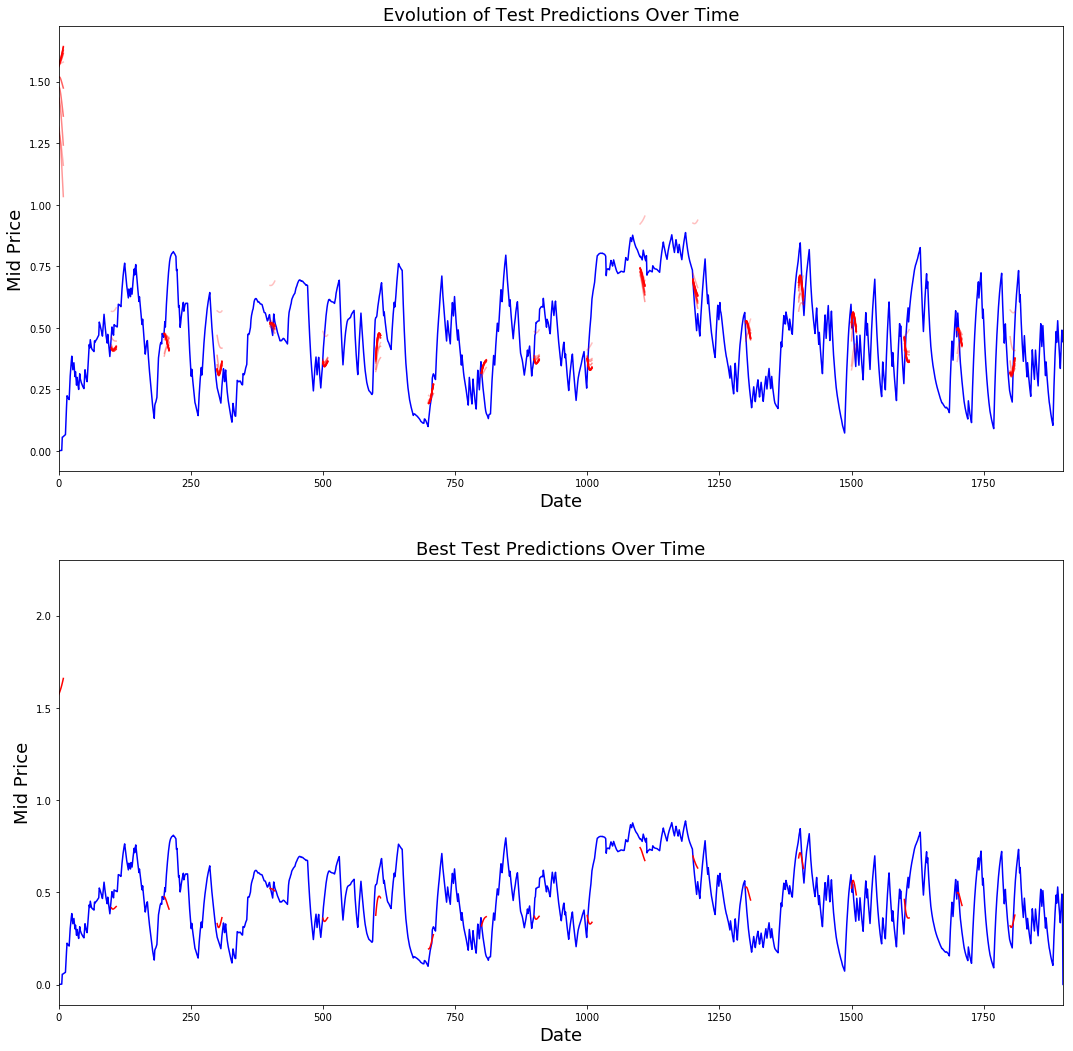

In [0]:
best_prediction_epoch = 29 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(1900),all_mid_data[:1900],color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(0, 1900)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df_new.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(0, 1900)
plt.show()